# Imports and Data Handling

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import src as tools
from tensorflow import keras
from tensorflow.keras import layers
#import seaborn as sns

In [2]:
np.random.seed(0)

In [3]:
df = pd.read_csv("C:\\Users\\sharv\\184\\final\\FetusHealthML\\Project\\fetal_health.csv")

#As discussed in the project proposal, we will experiment with using only the first 7 features that are actual recordings of
#the patients monitoring.
short_df = df[['baseline value','accelerations','fetal_movement','uterine_contractions'
               ,'light_decelerations','severe_decelerations','prolongued_decelerations']]

y_labels = df[['fetal_health']]

df = df.loc[:,df.columns!="fetal_health"]

df = df.to_numpy()
short_df = short_df.to_numpy()
y_labels = y_labels.to_numpy()
y_labels = y_labels-1

print("Original dataset:",df.shape[0],"datapoints,",df.shape[1],"features")
print("Shortened Dataset:",short_df.shape[0],"datapoints,",short_df.shape[1],"features")
print("True labels of Dataset:",y_labels.shape)
#Thankfully all the values are numerical, no need to reencode them
# TODO: MAYBE WANT TO NORMALIZE DATASET? CONSIDER DELETING SEVERE_DECELERATIONS COL SINCE ITS ALMOST ALL 0??

Original dataset: 2126 datapoints, 21 features
Shortened Dataset: 2126 datapoints, 7 features
True labels of Dataset: (2126, 1)


In [4]:
#With the dataset prepared, we must split it into training, validation, and testing sets.
#Note: The validation set is really only for the Neural Network model. We will do another split for it seperately
x_train, x_test, y_train, y_test = train_test_split(short_df, y_labels, test_size=0.2,stratify=y_labels)
print("Training Set size:",x_train.shape)
print("Training Targt size", y_train.shape)
print("Testing Set size:",x_test.shape)

Training Set size: (1700, 7)
Training Targt size (1700, 1)
Testing Set size: (426, 7)


In [5]:
#x_train = np.array(x_train)
#x_test = np.array(x_test)
#y_train = np.array(y_train)
#y_test = np.array(y_test)

# KNN(small dataset & cross validation)

array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 3.00e-03, 0.00e+00, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 3.00e-03, 0.00e+00, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0


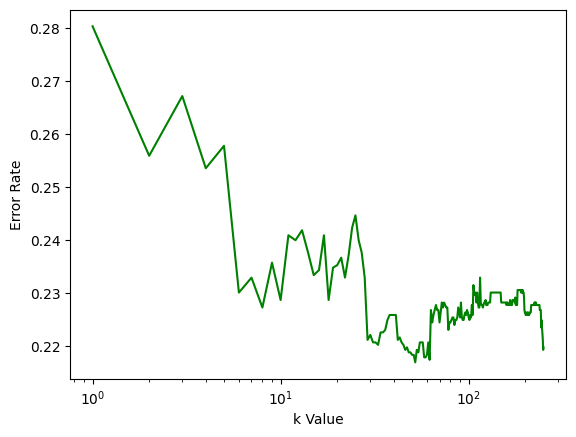

Lowest error rate is 0.21693123446561727 at k = 52
Training Set size: (1700, 7)
Training Targt size (1700, 1)
Testing Set size: (426, 7)
Accuracy score: 0.7863849765258216
F1 score: 0.7175491936055317


C:\Users\sharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


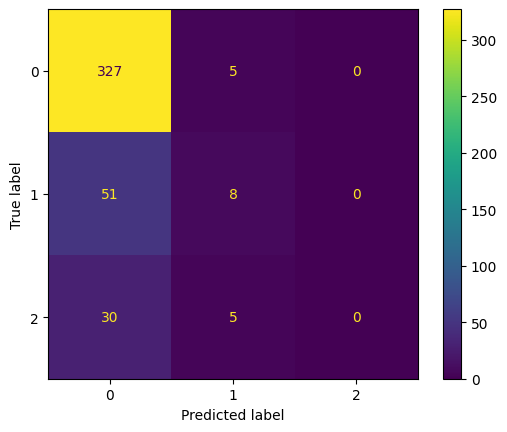

In [6]:
#Using the KNNClassifier from the sklearnknn_classifier.fit(X_train, y_train) library, we will experiment with different values of k.

KNN_crossValidationErrors = [0]*250

x_train = short_df
y_train = y_labels


display(x_train)
x_train = np.array(x_train)
y_train = np.array(y_train)


for k in range(250):
    k = k+1 #1-250 not 0-249
    if(k%25==0):
        print(k/2.5) #Scuffed progress bar
    # Cross-validation with 5 fold
    nFolds = 5
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = tools.crossValidate(x_train, y_train,nFolds, iFold)
        knnClassifier = KNeighborsClassifier(n_neighbors=k)
        knnClassifier.fit(Xti, Yti)
    
        cross_validation_pred = knnClassifier.predict(Xvi)
    
        cross_validation_accuracy = accuracy_score(Yvi,cross_validation_pred)

        cross_validation_error = 1-cross_validation_accuracy
        KNN_crossValidationErrors[k-1] += cross_validation_error
    KNN_crossValidationErrors[k-1] = KNN_crossValidationErrors[k-1]/nFolds

plt.semilogx(range(1, len(KNN_crossValidationErrors) + 1), KNN_crossValidationErrors, color='g')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.show()

print("Lowest error rate is",min(KNN_crossValidationErrors),"at k =",KNN_crossValidationErrors.index(min(KNN_crossValidationErrors))+1)
# k = KNN_testErrors.index(min(KNN_testErrors))+1 because it's pulling the error rate from a list (starts at 0)
#But k values actually start at k = 1
bestk = KNN_crossValidationErrors.index(min(KNN_crossValidationErrors))+1


#Confusion Matrix for best performing KNN.
x_train, x_test, y_train, y_test = train_test_split(short_df, y_labels, test_size=0.2,stratify=y_labels)
print("Training Set size:",x_train.shape)
print("Training Targt size", y_train.shape)
print("Testing Set size:",x_test.shape)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

knnClassifier = KNeighborsClassifier(n_neighbors=bestk)
knnClassifier.fit(x_train, y_train)
y_test_pred = knnClassifier.predict(x_test)
matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
print("Accuracy score: {}".format(accuracy_score(y_test,y_test_pred)))
print("F1 score: {}".format(f1_score(y_test, y_test_pred,average="weighted")))

# KNN(normal dataset & NO cross validation)

Training Set size: (1700, 21)
Testing Set size: (426, 21)
10
20
30
40
50
60
70
80
90
100


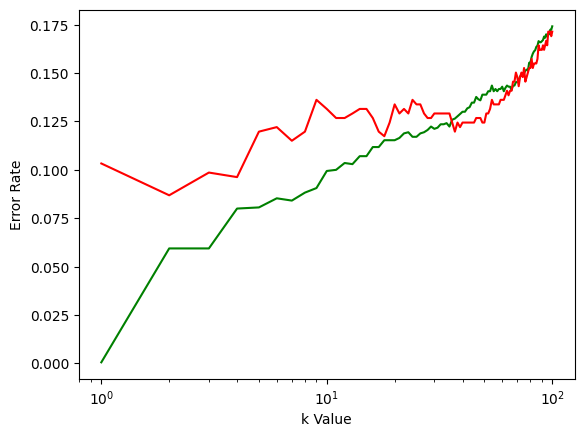

Lowest error rate is 0.08685446009389675 at k = 2
Accuracy: 0.9131455399061033
F1 Score: 0.9064435688487033


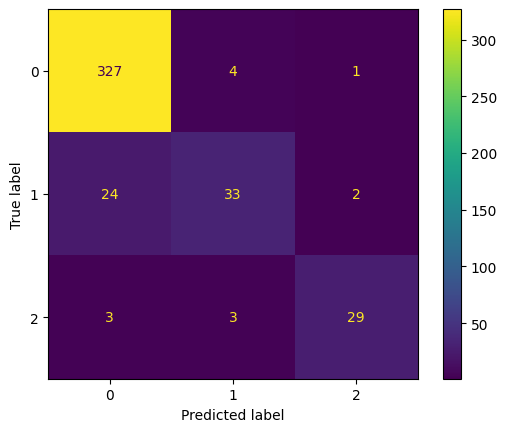

In [10]:
#We will repeat the same process, but with the entire dataset. To save time, I will only test for up to k=100. 
#In all likelihood, the best k value will reveal itself early on
x_train2, x_test2, y_train2, y_test2 = train_test_split(df, y_labels, test_size=0.2,stratify=y_labels)
print("Training Set size:",x_train2.shape)
print("Testing Set size:",x_test2.shape)

KNN_testErrors = [] #index will represent k value. Testing up to k = 100
KNN_trainErrors = []
for k in range(100):
    k = k+1 #1-100, not 0-99
    if(k%10==0):
        print(k) #Scuffed progress bar
    knnClassifier = KNeighborsClassifier(n_neighbors=k)
    knnClassifier.fit(x_train2, y_train2.ravel())
    
    y_train_pred2 = knnClassifier.predict(x_train2)
    y_test_pred2 = knnClassifier.predict(x_test2)
    
    train_accuracy2 = accuracy_score(y_train2,y_train_pred2)
    test_accuracy2 = accuracy_score(y_test2,y_test_pred2)
    train_error2 = 1-train_accuracy2
    test_error2 = 1-test_accuracy2
    KNN_trainErrors.append(train_error2)
    KNN_testErrors.append(test_error2)
    
plt.semilogx(range(1, len(KNN_trainErrors) + 1), KNN_trainErrors, color='g')
plt.semilogx(range(1, len(KNN_testErrors) + 1), KNN_testErrors, color='r')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.show()

bestk = KNN_testErrors.index(min(KNN_testErrors))+1
print("Lowest error rate is",min(KNN_testErrors),"at k =",bestk)

knnClassifier = KNeighborsClassifier(n_neighbors=bestk)
knnClassifier.fit(x_train2, y_train2.ravel())
y_test_pred2 = knnClassifier.predict(x_test2)

matrix = confusion_matrix(y_test2, y_test_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
print("Accuracy: {}".format(accuracy_score(y_test2,y_test_pred2)))
print("F1 Score: {}".format(f1_score(y_test2, y_test_pred2, average="weighted")))

# KNN(normal dataset & cross validation)

Training Set size: (2126, 21)
Training Labels size:
10
20
30
40
50
60
70
80
90
100


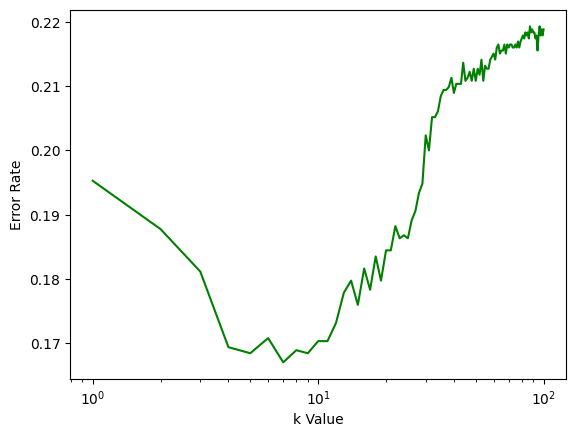

Lowest cross-validation error rate is 0.16705109085887876 at k = 7
Accuracy: 0.8896713615023474
F1 Score: 0.8823739229341158


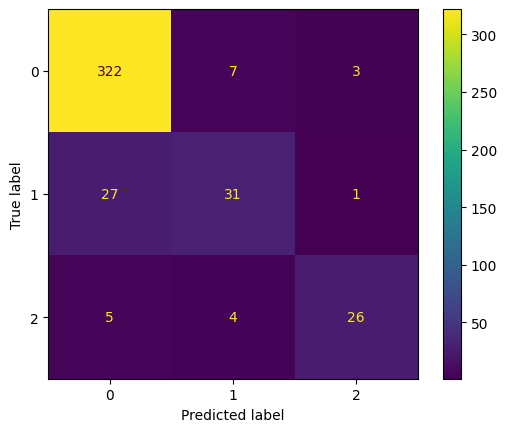

In [13]:
#We will repeat the same process, but with the entire dataset. To save time, I will only test for up to k=100. 
#In all likelihood, the best k value will reveal itself early on
x_train2 = df
y_train2 = y_labels
print("Training Set size:",x_train2.shape)
print("Training Labels size:",)

x_train2 = np.array(x_train2)
y_train2 = np.array(y_train2)

KNN_testErrors = [0]*100 #index will represent k value. Testing up to k = 100
KNN_trainErrors = [0]*100
for k in range(100):
    k = k+1 #1-100, not 0-99
    if(k%10==0):
        print(k) #Scuffed progress bar
    nFolds = 5
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = tools.crossValidate(x_train2, y_train2,nFolds, iFold)
        knnClassifier = KNeighborsClassifier(n_neighbors=k)
        knnClassifier.fit(Xti, Yti)
    
        y_train_pred2 = knnClassifier.predict(Xvi)
    
        train_accuracy2 = accuracy_score(Yvi,y_train_pred2)
        train_error2 = 1-train_accuracy2
        KNN_trainErrors[k-1] += train_error2
    KNN_trainErrors[k-1] = KNN_trainErrors[k-1]/5
    
plt.semilogx(range(1, len(KNN_trainErrors) + 1), KNN_trainErrors, color='g')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.show()

bestk = KNN_trainErrors.index(min(KNN_trainErrors))+1
print("Lowest cross-validation error rate is",min(KNN_trainErrors),"at k =",bestk)

x_train2, x_test2, y_train2, y_test2 = train_test_split(df, y_labels, test_size=0.2,stratify=y_labels)
knnClassifier = KNeighborsClassifier(n_neighbors=bestk)
knnClassifier.fit(x_train2, y_train2.ravel())
y_test_pred2 = knnClassifier.predict(x_test2)
matrix = confusion_matrix(y_test2, y_test_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
print("Accuracy: {}".format(accuracy_score(y_test2,y_test_pred2)))
print("F1 Score: {}".format(f1_score(y_test2, y_test_pred2, average="weighted")))

Overall, KNN had some decent predicting power. As expected, as more features became considered, KNN's prediction accuracy on testing sets declined significantly. 

## MLP 

In [14]:
#Before creating the models and such, we msut create the training, validation, and testing splits.
#x_temp, x_test, y_temp, y_test = train_test_split(short_df, y_labels, test_size=0.2,stratify=y_labels)
#x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2,stratify=y_temp)
#x_train, x_test, y_train, y_test = train_test_split(short_df, y_labels, test_size=0.2,stratify=y_labels)

#x_train = np.array(x_train)
#x_test = np.array(x_test)
#y_train = np.array(y_train)
#y_test = np.array(y_test)
#y_train = y_train.astype(int)
#y_test = y_test.astype(int)

In [15]:
#We'll start with a simple one
model = keras.Sequential(name="FetusHealthNNmodel1")
model.add(layers.Dense(25, activation='relu',input_dim=7))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [16]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(model.summary())


Model: "FetusHealthNNmodel1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                200       
                                                                 
 dense_1 (Dense)             (None, 12)                312       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 551 (2.15 KB)
Trainable params: 551 (2.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
nFolds = 5
testingCrossValidationError = []
for iFold in range(nFolds):
    Xti, Xvi, Yti, Yvi = tools.crossValidate(short_df, y_labels,nFolds, iFold)
    model.fit(Xti, Yti, epochs=5)
    y_test_pred = np.argmax(model.predict(Xvi),axis=1) #to get the prediction based off of the softmax results
    test_accuracy = accuracy_score(Yvi,y_test_pred)
    testingCrossValidationError.append(test_accuracy)


Epoch 1/5


54/54 [==============================] - 1s 2ms/step - loss: 3.6552 - accuracy: 0.7678
Epoch 2/5
54/54 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.8289
Epoch 3/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.8289
Epoch 4/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.8289
Epoch 5/5
14/14 [==============================] - 0s 2ms/step
Epoch 1/5
54/54 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.8089
Epoch 2/5
54/54 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.8089
Epoch 3/5
54/54 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.8089
Epoch 4/5
54/54 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.8089
Epoch 5/5
14/14 [==============================] - 0s 2ms/step
Epoch 1/5
54/54 [==============================] - 0s 2ms/step - loss: 0.7864 - accuracy: 0.7282

In [18]:
avgTestAccuracy = sum(testingCrossValidationError)/nFolds
print("Testing Accuracy:",avgTestAccuracy)
print("F1 Score:",f1_score(Yvi, y_test_pred,average="weighted"))

Testing Accuracy: 0.7783628831814415
F1 Score: 0.7078595626732368


In [19]:
#Repeating same NN model but with the whole dataset
model = keras.Sequential(name="FetusHealthNNmodel2")
model.add(layers.Dense(25, activation='relu',input_dim=21))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [20]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "FetusHealthNNmodel2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                550       
                                                                 
 dense_4 (Dense)             (None, 12)                312       
                                                                 
 dense_5 (Dense)             (None, 3)                 39        
                                                                 
Total params: 901 (3.52 KB)
Trainable params: 901 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
nFolds = 5
testingCrossValidationError = []
for iFold in range(nFolds):
    Xti, Xvi, Yti, Yvi = tools.crossValidate(df, y_labels,nFolds, iFold)
    model.fit(Xti, Yti, epochs=5)
    y_test_pred = np.argmax(model.predict(Xvi),axis=1) #to get the prediction based off of the softmax results
    test_accuracy = accuracy_score(Yvi,y_test_pred)
    testingCrossValidationError.append(test_accuracy)

Epoch 1/5
54/54 [==============================] - 0s 1ms/step - loss: 14.3016 - accuracy: 0.7672
Epoch 2/5
54/54 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.8430
Epoch 3/5
54/54 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.8348
Epoch 4/5
54/54 [==============================] - 0s 1ms/step - loss: 0.5329 - accuracy: 0.8448
Epoch 5/5
14/14 [==============================] - 0s 1ms/step
Epoch 1/5
54/54 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.8089
Epoch 2/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.8236
Epoch 3/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.8201
Epoch 4/5
54/54 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.8254
Epoch 5/5
14/14 [==============================] - 0s 1ms/step
Epoch 1/5
54/54 [==============================] - 0s 2ms/step - loss: 0.7441 - accuracy: 0.7382


In [22]:
avgTestAccuracy = sum(testingCrossValidationError)/nFolds
print("Testing Accuracy:",avgTestAccuracy)
print("F1 Score:",f1_score(Yvi, y_test_pred,average="weighted"))

Testing Accuracy: 0.7689511184755592
F1 Score: 0.7078595626732368
